# Modeling Phase

Created by: Elianneth Cabrera

In [2]:
#importing libraries and packages
import pandas as pd
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from neuralprophet import NeuralProphet

In [3]:
#loading the data
data= pd.read_csv('crime_data_total.csv', sep= ',')
data.head()

,Year,Estimated_Population,Total_number_of_crimes,Murder,Rape,Robbery,Assault,Burglary,Theft,Motor_Vehicle_Theft,...,Percent_house_unit_vacant,Minimal_wage_per_hour,White_race,Black_race,Hispanic_ethnicity,Native_American_race,Asian_race,Multiracial,Native_Hawaian_race,Unemployment_persons_avg
0,2022,2933824,74444,163,1160,1042,10484,8264,45303,7558,...,1.0,7.25,75.75,5.75,9.56,1.05,2.94,4.97,0.1,43133
1,2021,2948018,81862,173,1187,1077,10985,9751,49663,8514,...,0.9,7.25,74.70,5.80,12.70,0.80,3.10,2.80,0.1,64600
2,2020,2942512,87920,193,1190,1312,11201,11267,53381,8802,...,1.2,7.25,75.00,5.80,12.50,0.80,3.10,2.70,0.1,69975
3,2019,2972391,87471,130,1297,1422,9845,11277,54990,8047,...,1.3,7.25,75.40,5.70,12.30,0.80,3.10,2.70,0.1,47825
4,2018,2929226,92686,146,1346,1599,9276,12459,58885,8351,...,1.6,7.25,75.60,5.70,12.10,0.80,3.10,2.60,0.1,51275


In [4]:
data.isnull().sum()

Year                         0
Estimated_Population         0
Total_number_of_crimes       0
Murder                       0
Rape                         0
Robbery                      0
Assault                      0
Burglary                     0
Theft                        0
Motor_Vehicle_Theft          0
Arson                        0
Male_Officers                0
Female_Officers              0
Per_capita_income            0
Percent_poverty              0
Number_of_schools            0
GDP                          0
College                      0
Community_college            0
Total_employment             0
Country_inflation            0
Percent_house_unit_vacant    0
Minimal_wage_per_hour        0
White_race                   0
Black_race                   0
Hispanic_ethnicity           0
Native_American_race         0
Asian_race                   0
Multiracial                  0
Native_Hawaian_race          0
Unemployment_persons_avg     0
dtype: int64

In [5]:
data.dtypes

Year                           int64
Estimated_Population           int64
Total_number_of_crimes         int64
Murder                         int64
Rape                           int64
Robbery                        int64
Assault                        int64
Burglary                       int64
Theft                          int64
Motor_Vehicle_Theft            int64
Arson                          int64
Male_Officers                  int64
Female_Officers                int64
Per_capita_income              int64
Percent_poverty              float64
Number_of_schools              int64
GDP                          float64
College                        int64
Community_college              int64
Total_employment               int64
Country_inflation            float64
Percent_house_unit_vacant    float64
Minimal_wage_per_hour        float64
White_race                   float64
Black_race                   float64
Hispanic_ethnicity           float64
Native_American_race         float64
A

In [6]:
data.columns

Index(['Year', 'Estimated_Population', 'Total_number_of_crimes', 'Murder',
       'Rape', 'Robbery', 'Assault', 'Burglary', 'Theft',
       'Motor_Vehicle_Theft', 'Arson', 'Male_Officers', 'Female_Officers',
       'Per_capita_income', 'Percent_poverty', 'Number_of_schools', 'GDP',
       'College', 'Community_college', 'Total_employment', 'Country_inflation',
       'Percent_house_unit_vacant', 'Minimal_wage_per_hour', 'White_race',
       'Black_race', 'Hispanic_ethnicity', 'Native_American_race',
       'Asian_race', 'Multiracial', 'Native_Hawaian_race',
       'Unemployment_persons_avg'],
      dtype='object')

In [7]:
#dropping columns in the data set
df= data.drop(['Year', 'Rape', 'Robbery', 'Assault', 'Burglary', 'Theft',
       'Motor_Vehicle_Theft', 'Arson'], axis= 1)

In [9]:
#target y features
X= df.drop('Murder', axis= 1)  #features
y= df['Murder']                #target


In [12]:
#train and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 21)

#create the linear regression model
reg= LinearRegression()

#fit the model
reg_fit= reg.fit(X_train, y_train)

#make predictions
y_pred= reg.predict(X_test)

#evaluation of the model
score= reg_fit.score(X_test, y_test)
mse= mean_squared_error(y_test, y_pred)

print(f"Score: {score}")
print(f"Mean square error: {mse}")

Score: -6.631420783527006
Mean square error: 2054.7600459646465


# Forecasting with Neural Prophet

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as YS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000


  0%|          | 0/101 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.80E-02, min: 1.58E+00


  0%|          | 0/101 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.80E-02, min: 1.58E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.25E-02
Epoch[1000/1000]: 100%|██████████| 1000/1000 [00:11<00:00, 85.19it/s, SmoothL1Loss=0.00754, MAE=10.1, RMSE=12.4, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency -365D corresponds to 70.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency YS is different than major frequency -365D
WARNING - (py.warnings._showwarnmsg) - c:\Users\Indatech\anaconda3\envs\weather_app_st\lib\site-packages\neuralprophet\forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 96.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO -

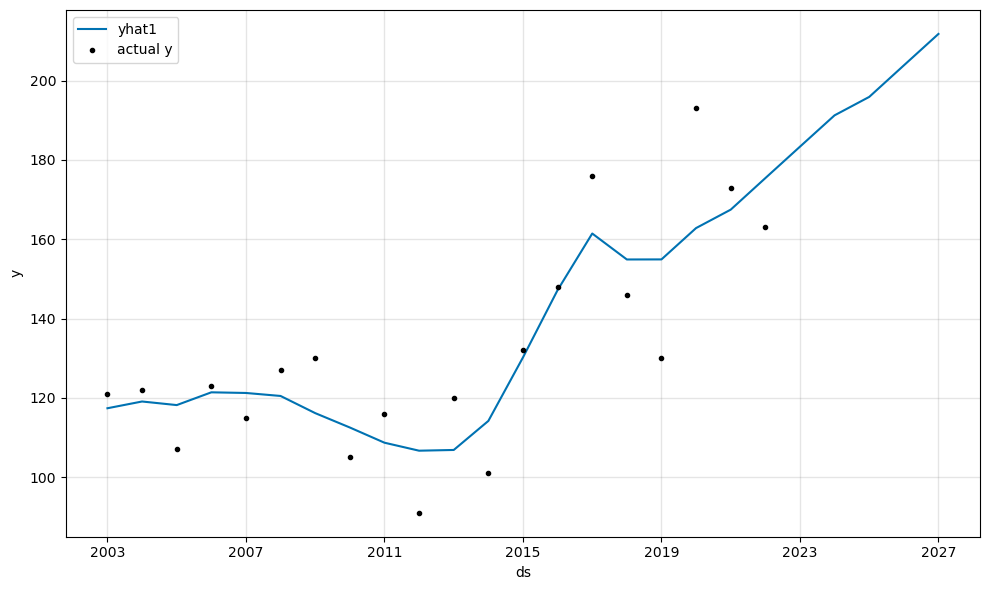

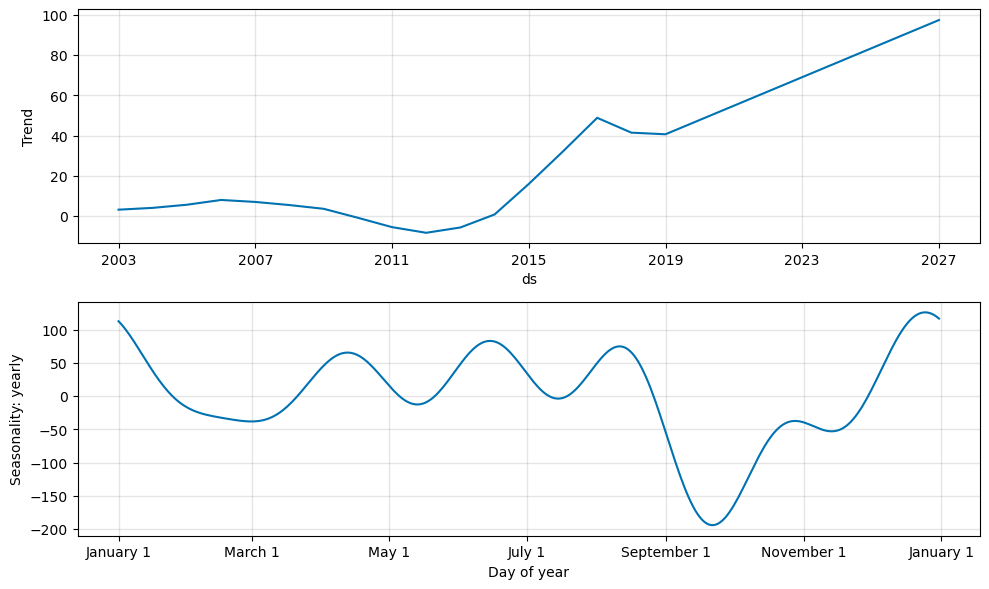

In [13]:
#train set
data['Year']= pd.to_datetime(data['Year'], format='%Y')

df_train= data[['Year', 'Murder']]
df_train.columns= ['ds', 'y']

# Initialize the NeuralProphet model
model = NeuralProphet()

# Fit the model to the training data
model.fit(df_train)

# Generate forecasts for the testing period
future = model.make_future_dataframe(df_train, periods= 5, n_historic_predictions=len(df_train))
forecast = model.predict(future)

#ploting the forecast
plot_1 = model.plot(forecast)
plot_2 = model.plot_components(forecast)

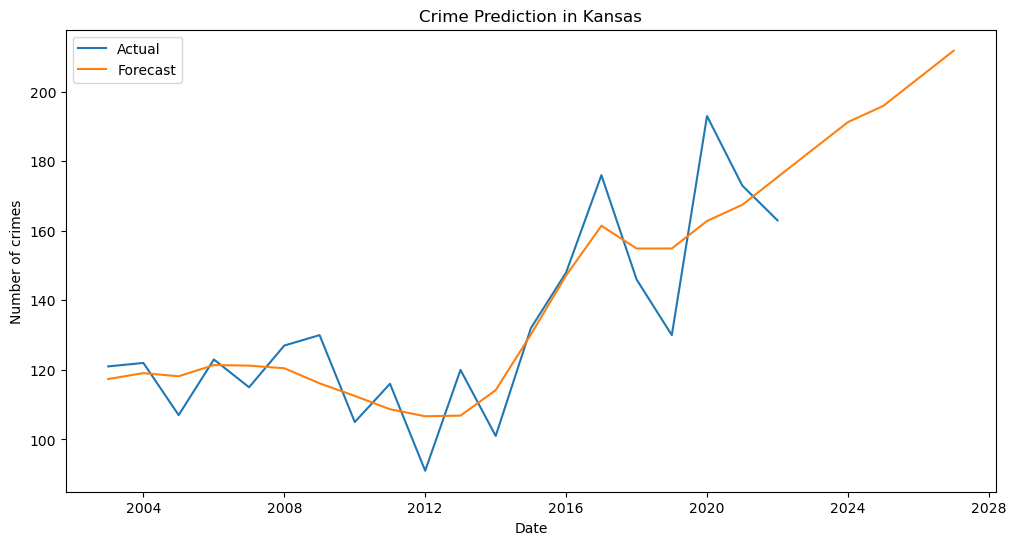

In [14]:
# Plot the forecasted values and the actual values
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_train['ds'], df_train['y'], label='Actual')
ax.plot(forecast['ds'], forecast['yhat1'], label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Number of crimes')
ax.set_title('Crime Prediction in Kansas')
ax.legend()
plt.show()